In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df = pd.read_csv('Industry_Portfolios.csv',index_col=0)

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (0,1,2,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,21,22,23,24,25,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df = df[11903:24099]
df = df.reset_index(drop=True)

In [4]:
df.head()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
0,0.54,0.55,-0.19,0.43,0.84,0.91,1.15,-0.04,0.69,0.38,...,0.29,0.81,0.39,0.43,1.36,0.2,0.3,1.44,0.07,3.69
1,0.89,1.27,0.51,1.02,0.95,2.44,0.35,0.28,0.83,0.48,...,1.71,0.76,1.27,0.08,1.37,1.42,0.72,1.74,0.16,-0.04
2,-0.17,0.69,0.57,1.49,-0.02,1.51,0.51,0.61,0.75,0.65,...,1.01,0.68,0.96,0.12,1.38,2.24,-0.21,1.39,1.35,2.58
3,1.27,-0.65,-0.61,0.42,-0.26,-1.07,-1.84,0.3,-0.52,-0.44,...,-0.47,-1.21,-0.42,-0.51,-0.66,-0.74,-1.52,-2.33,-0.86,-2.26
4,-0.71,-0.56,-0.94,-0.21,-1.36,-2.04,-2.36,-0.66,-1.38,-1.77,...,-1.39,-1.35,-1.36,-1.29,-2.48,-0.88,-1.39,-1.9,-1.54,-1.77


In [5]:
df = df.T
df.head()

,0,1,2,3,4,5,6,7,8,9,...,12186,12187,12188,12189,12190,12191,12192,12193,12194,12195
Agric,0.54,0.89,-0.17,1.27,-0.71,0.3,-2.84,-0.26,-2.53,1.26,...,-0.03,-0.09,0.13,-0.13,-0.06,-0.19,0.01,0.09,-0.35,0.00
Food,0.55,1.27,0.69,-0.65,-0.56,-0.53,-1.27,0.01,-1.22,-0.68,...,-0.25,-0.51,0.33,0.05,-0.03,-0.16,-0.20,0.12,-1.88,2.41
Soda,-0.19,0.51,0.57,-0.61,-0.94,0.06,-0.31,0.17,0.83,-0.30,...,-0.26,0.26,-0.30,-0.05,-0.18,-0.62,0.45,-0.32,-0.39,0.56
Beer,0.43,1.02,1.49,0.42,-0.21,-0.19,-1.61,-0.66,-0.48,-0.75,...,-0.36,0.50,-0.69,0.21,-0.55,-0.59,0.26,-0.36,-0.44,1.26
Smoke,0.84,0.95,-0.02,-0.26,-1.36,-0.76,-0.43,-0.32,-0.68,-0.93,...,-0.11,-2.54,1.14,-0.41,-0.66,-1.06,1.30,-1.10,-1.24,0.08


In [6]:
data = df.to_numpy()
data

array([[0.54, 0.89, -0.17, ..., '   0.09', '  -0.35', '   0.00'],
       [0.55, 1.27, 0.69, ..., '   0.12', '  -1.88', '   2.41'],
       ['  -0.19', '   0.51', '   0.57', ..., '  -0.32', '  -0.39',
        '   0.56'],
       ...,
       [1.44, 1.74, 1.39, ..., '  -0.04', '  -0.68', '   0.91'],
       [0.07, 0.16, 1.35, ..., '  -0.12', '  -0.81', '   0.09'],
       [3.69, -0.04, 2.58, ..., '  -0.55', '  -0.58', '  -0.50']],
      dtype=object)

In [7]:
for i in range(len(data)):
    for j in range(len(data[0])):
        if not type(data[i][j]) is float:
                data[i][j] = float(data[i][j])

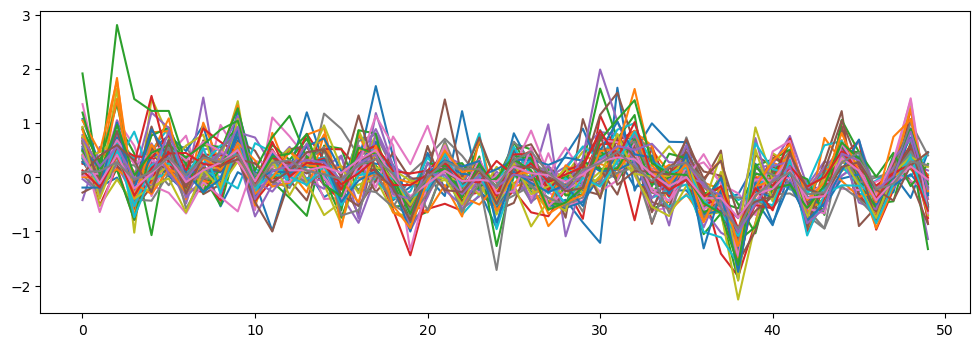

In [8]:
N = len(data) #Number of time series
T = len(data[0]) # Number of time steps

# Standardizing data by subtracting mean and dividing by std. dev.
X = np.zeros((N, T))
for i in range(N):
    X[i] = (data[i]-np.mean(data[i]))/(np.std(data[i]))
    
plot1 = plt.figure(1,figsize=(12,4), dpi=100)
for i in range(len(X)):
    plt.plot(X[i][2000:2050])

In [9]:
C = np.corrcoef(X)

triang = int(((N*N)-N)/2)

values_C = np.zeros(triang)
count = 0
for j in range(N):
    for h in range(j+1,N):
        values_C[count] = C[j][h]
        count = count+1

In [ ]:
yticklabels=np.arange(1,49)
xticklabels=np.arange(1,49)
print(yticklabels)

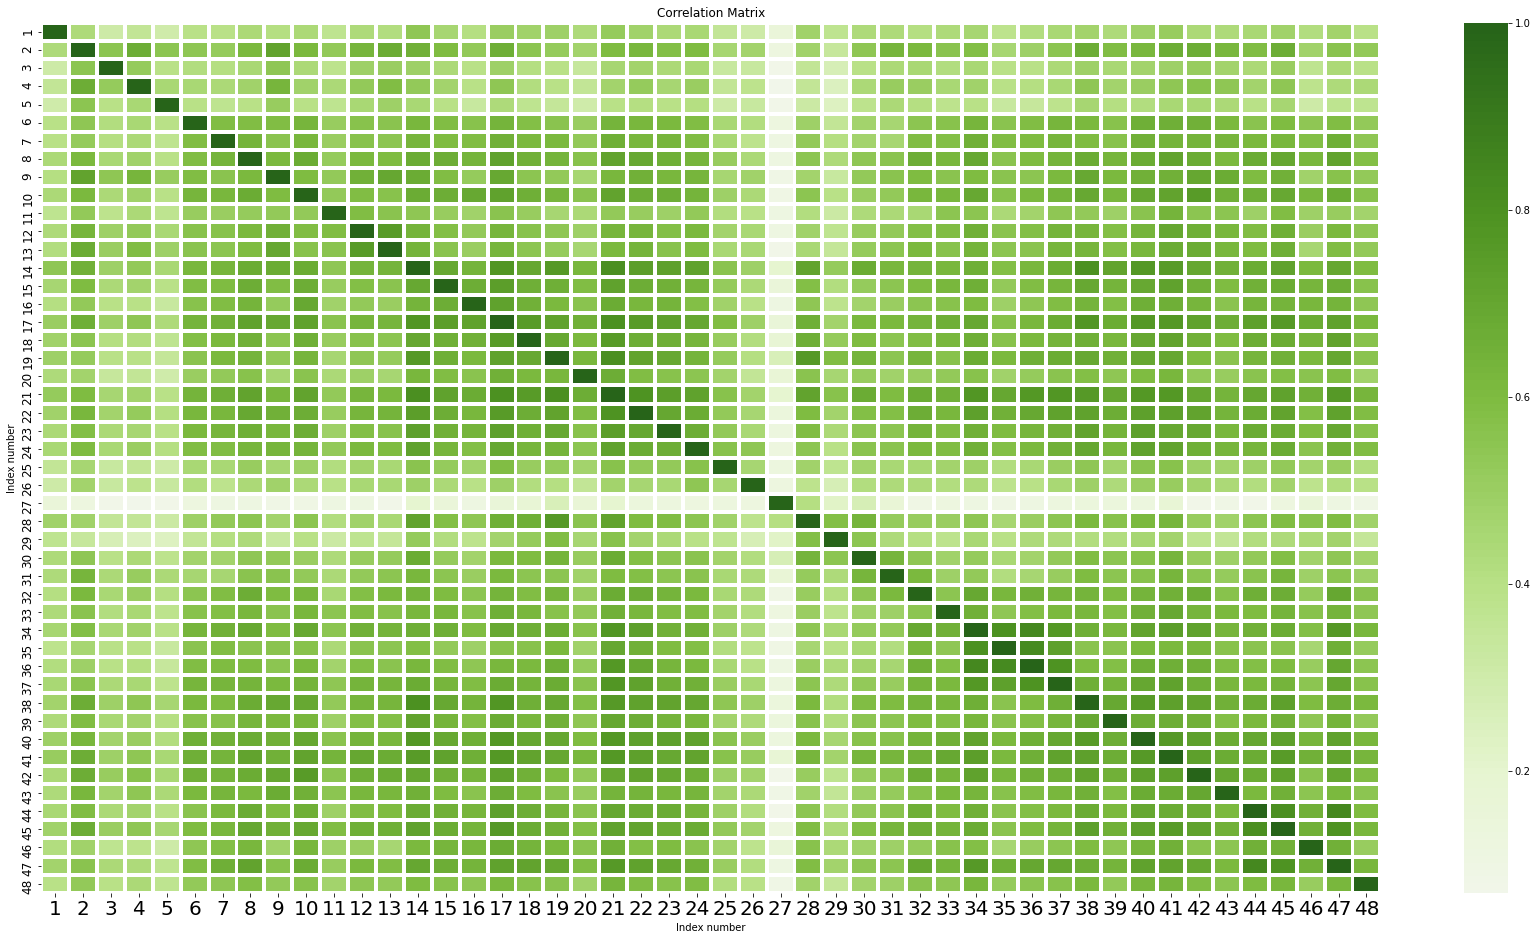

In [50]:
plt.figure(figsize=(30,16))
m = sn.heatmap(np.round(C, 2),annot=False,linewidths=3,cmap="PiYG", fmt='g',annot_kws={"size": 8},center=0,yticklabels=yticklabels,xticklabels=xticklabels)
m.set_xticklabels(m.get_xmajorticklabels(), fontsize = 20)
m.set_yticklabels(m.get_ymajorticklabels(), fontsize = 12)
plt.title('Correlation Matrix')
plt.xlabel("Index number")
plt.ylabel("Index number")
#plt.savefig('C_Matrix.png')

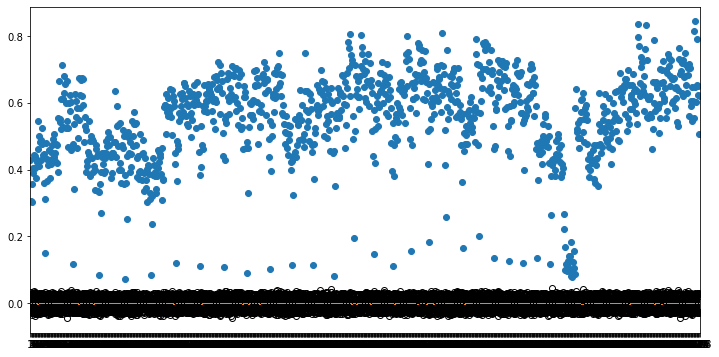

In [11]:
Nsamples = 500 # Number of shuffles
X_shuff = np.zeros((N, T))

# queremos guardar (N*N)-N)/2 values porque son los valores de la upper triang part de C matrix
# no nos interesa la lower triang porque es igual ni la diagonal de unos

triang = int(((N*N)-N)/2)
values = np.zeros((triang, Nsamples)) 

for k in range(Nsamples):
    for i in range(N):
        rand = X[i][np.random.permutation(T)] # Checa bootstrap en tail Fitting DS si no entiendes esta parte
        X_shuff[i] = rand

    C_shuff = np.corrcoef(X_shuff)

    count = 0
    for j in range(N):
        for h in range(j+1,N):
            values[count][k] = C_shuff[j][h]
            count = count+1


x = np.arange(triang)+1
plt.figure(figsize=(12,6))
plt.boxplot(np.transpose(values[:]))
plt.plot(x,values_C,"o")

# We can observe that all the correlation values are statistically significant

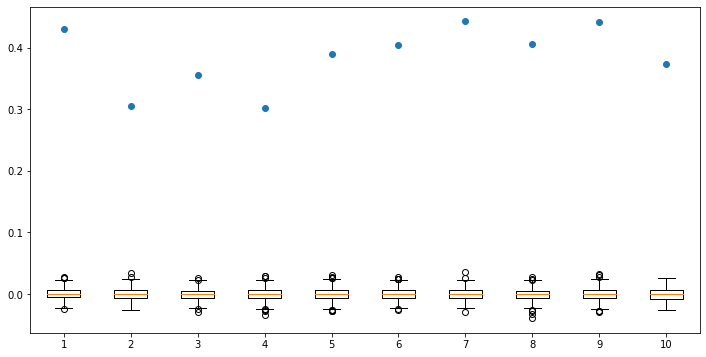

In [12]:
# Hay un chingo arriba porque acuerdate que es la upper triangular de corr matrix, checa los que quieras ver
plt.figure(figsize=(12,6))
plt.boxplot(np.transpose(values[:10]))
plt.plot(x[:10],values_C[:10],"o")

In [13]:
from numpy import linalg as LA

L, V = LA.eig(C)
#L = np.sort(L)[::-1]
sorted_ind = np.argsort(L)
sorted_ind = np.flip(sorted_ind) # porque los queremos en descending order

L = L[sorted_ind]
V = np.transpose(V)
V = V[sorted_ind]

In [14]:
for i in range(N):
    print("Eigenvalue ", i+1," = ", L[i], " Explains ", L[i]/N*100, "% of the variance")

Eigenvalue  1  =  27.528224169188675  Explains  57.35046701914307 % of the variance
Eigenvalue  2  =  1.8419401296798774  Explains  3.8373752701664112 % of the variance
Eigenvalue  3  =  1.4737446454404157  Explains  3.0703013446675325 % of the variance
Eigenvalue  4  =  1.0729911202395266  Explains  2.2353981671656804 % of the variance
Eigenvalue  5  =  0.8536789322759771  Explains  1.7784977755749523 % of the variance
Eigenvalue  6  =  0.8017215550420855  Explains  1.6702532396710115 % of the variance
Eigenvalue  7  =  0.7236351679337273  Explains  1.5075732665285986 % of the variance
Eigenvalue  8  =  0.6529876870621847  Explains  1.3603910147128848 % of the variance
Eigenvalue  9  =  0.6417693021433176  Explains  1.337019379465245 % of the variance
Eigenvalue  10  =  0.6167993421568178  Explains  1.2849986294933704 % of the variance
Eigenvalue  11  =  0.568647818271541  Explains  1.1846829547323772 % of the variance
Eigenvalue  12  =  0.524846985869621  Explains  1.0934312205617103

Text(0, 0.5, '% of explained variance')

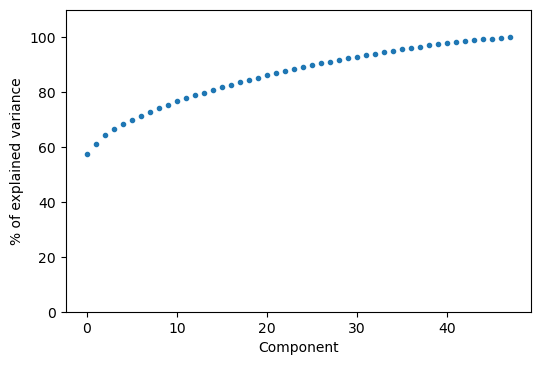

In [15]:
plot1 = plt.figure(1,figsize=(6,4), dpi=100)
plt.ylim([0,110])
plt.plot(np.cumsum(L)/N*100,".")
plt.xlabel("Component")
plt.ylabel("% of explained variance")
#plt.title("Eigenvalues")


In [16]:
np.cumsum(L)

array([27.52822417, 29.3701643 , 30.84390894, 31.91690006, 32.770579  ,
       33.57230055, 34.29593572, 34.94892341, 35.59069271, 36.20749205,
       36.77613987, 37.30098686, 37.81565817, 38.31871438, 38.80673389,
       39.26104565, 39.6924282 , 40.11857871, 40.53367847, 40.9423004 ,
       41.33247908, 41.72145787, 42.08045934, 42.43110403, 42.76130044,
       43.08779243, 43.40835684, 43.71966115, 44.016528  , 44.30928424,
       44.5977018 , 44.8757602 , 45.14136777, 45.39766988, 45.65196455,
       45.89160824, 46.12568596, 46.35116239, 46.55853877, 46.7571955 ,
       46.94907372, 47.12830409, 47.29844203, 47.46246937, 47.62095946,
       47.7643217 , 47.88487113, 48.        ])

In [17]:
# Solo imprimimos los primeros dos eigenvectors
for i in range(N):
    print("Cp.", i+1, "of 1st Eigenvector = ", V[0][i]," Cp.", i+1, "of 2nd Eigenvector = ", V[1][i])

Cp. 1 of 1st Eigenvector =  -0.11023070710801461  Cp. 1 of 2nd Eigenvector =  0.08406781794565224
Cp. 2 of 1st Eigenvector =  -0.1448420572304597  Cp. 2 of 2nd Eigenvector =  -0.25286204074541896
Cp. 3 of 1st Eigenvector =  -0.11030250385275858  Cp. 3 of 2nd Eigenvector =  -0.2315780404507615
Cp. 4 of 1st Eigenvector =  -0.1191450829280826  Cp. 4 of 2nd Eigenvector =  -0.3175124725422909
Cp. 5 of 1st Eigenvector =  -0.10025894786315909  Cp. 5 of 2nd Eigenvector =  -0.2570602706120043
Cp. 6 of 1st Eigenvector =  -0.1415598416328548  Cp. 6 of 2nd Eigenvector =  -0.04849196712175524
Cp. 7 of 1st Eigenvector =  -0.14443726668592208  Cp. 7 of 2nd Eigenvector =  0.01696901622089426
Cp. 8 of 1st Eigenvector =  -0.1550774465433786  Cp. 8 of 2nd Eigenvector =  -0.0018598064011105394
Cp. 9 of 1st Eigenvector =  -0.14747650559072156  Cp. 9 of 2nd Eigenvector =  -0.2510446617079508
Cp. 10 of 1st Eigenvector =  -0.15462919556214774  Cp. 10 of 2nd Eigenvector =  -0.014177198819524358
Cp. 11 of 1st E

In [18]:
low = np.zeros(45)
high = np.zeros(45)

cont1 = 0
cont2 = 0
for i in range(N):
    if np.absolute(V[0][i]) > 0.15:
        high[cont2] = i+1
        cont2 = cont2 +1
    if np.absolute(V[0][i]) < 0.15:
        low[cont1] = i+1
        cont1 = cont1 +1
        
        

In [19]:
high

array([ 8., 10., 14., 15., 17., 18., 19., 21., 22., 23., 24., 34., 37.,
       38., 40., 41., 42., 44., 45., 47.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.])

In [20]:
low

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 11., 12., 13., 16., 20.,
       25., 26., 27., 28., 29., 30., 31., 32., 33., 35., 36., 39., 43.,
       46., 48.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.])

Text(0.5, 1.0, 'Eigenvalues')

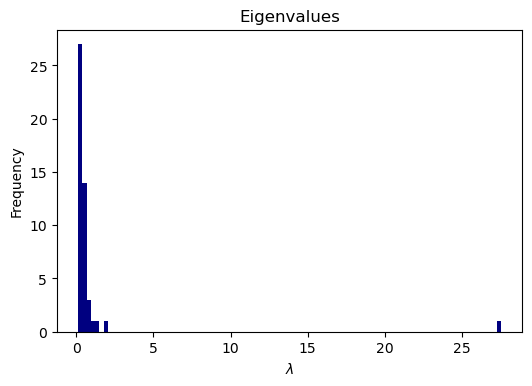

In [21]:
plot1 = plt.figure(1,figsize=(6,4), dpi=100)
plt.hist(L,100,color="navy")
plt.xlabel("$\lambda$")
plt.ylabel("Frequency")
plt.title("Eigenvalues")
#plt.savefig('user-review-count.png')'''

Text(0.5, 1.0, 'First Eigenvector [Market Mode]')

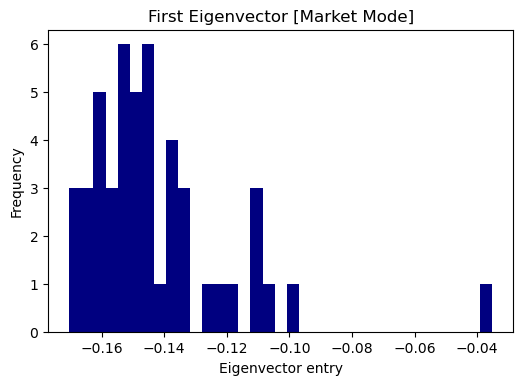

In [22]:
plot1 = plt.figure(1,figsize=(6,4), dpi=100)
plt.hist(V[0],35,color="navy")
plt.xlabel("Eigenvector entry")
plt.ylabel("Frequency")
plt.title("First Eigenvector [Market Mode]")

Text(0.5, 1.0, 'Second Eigenvector')

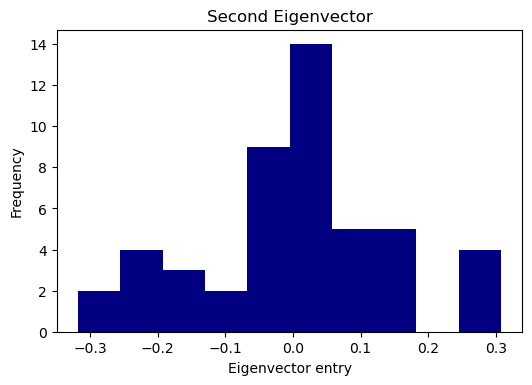

In [23]:
plot1 = plt.figure(1,figsize=(6,4), dpi=100)
plt.hist(V[1],10,color="navy")
plt.xlabel("Eigenvector entry")
plt.ylabel("Frequency")
plt.title("Second Eigenvector")

(-0.6, 0.6)

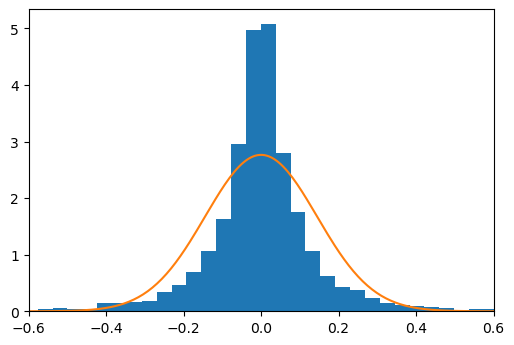

In [56]:
# Aqui lo dejaste usando todos los eigenvalues,, creo que no nos dice mucho este pedo

hi = np.zeros((N-4)*(N))
count = 0
for i in range(4,N):
    for j in range(N):
        hi[count] = V[i][j]
        count = count+1
x = np.linspace(-.6,.6,200)
F = np.sqrt(N/(2*np.pi))*np.exp(-((x**2)*N)/2)

plot1 = plt.figure(1,figsize=(6,4), dpi=100)
plt.hist(hi,40,density=True)
plt.plot(x,F)
plt.xlim([-.6,.6])

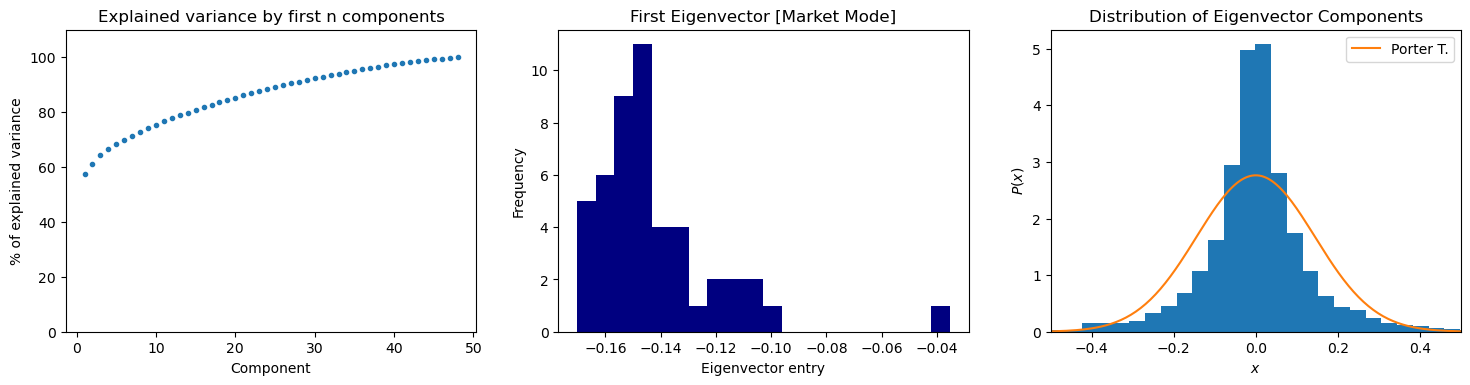

In [73]:
plot1 = plt.figure(1,figsize=(18,4), dpi=100)

plt.subplot(1,3,1)
plt.ylim([0,110])
plt.plot(xticklabels,np.cumsum(L)/N*100,".")
plt.xlabel("Component")
plt.ylabel("% of explained variance")
plt.title("Explained variance by first n components")

plt.subplot(1,3,2)
plt.hist(V[0],20,color="navy")
plt.xlabel("Eigenvector entry")
plt.ylabel("Frequency")
plt.title("First Eigenvector [Market Mode]")

plt.subplot(1,3,3)
plt.hist(hi,40,density=True)
plt.plot(x,F,label = "Porter T.")
plt.xlim([-.5,.5])
plt.xlabel("$x$")
plt.ylabel("$P(x)$")
plt.title("Distribution of Eigenvector Components")
plt.legend()
#plt.savefig('fig2.png')

In [26]:
# Computing principal components
# Los principal components estan perfectamente anti correlated, porque cada uno agrega
# completamente nueva informacion

E = np.zeros((N, T))
#for i in range(N):
    #E[i] = np.sum(V[:][i]*X)/np.sqrt(L[i])


for k in range(N):
    for j in range(T):
        for i in range(N):
            E[k][j] = E[k][j] + V[k][i]*X[i][j] 

for i in range(N):
    E[i][:] = E[i][:]/np.sqrt(L[i])
    
   

In [27]:
# Going back from Principal components to the actual time series
X_sim = np.zeros((N, T))

for k in range(N):
    for j in range(T):
        for i in range(1,N):
            X_sim[k][j] = X_sim[k][j] + V[i][k]*E[i][j]*np.sqrt(L[i])


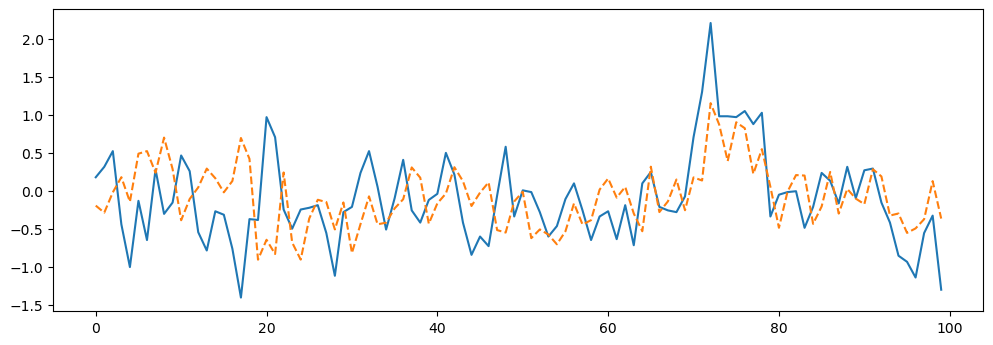

In [28]:
plot2 = plt.figure(2,figsize=(12,4), dpi=100)
plt.plot(X[30][0:100])
plt.plot(X_sim[30][0:100],"--")

In [29]:
C2 = np.corrcoef(X_sim)

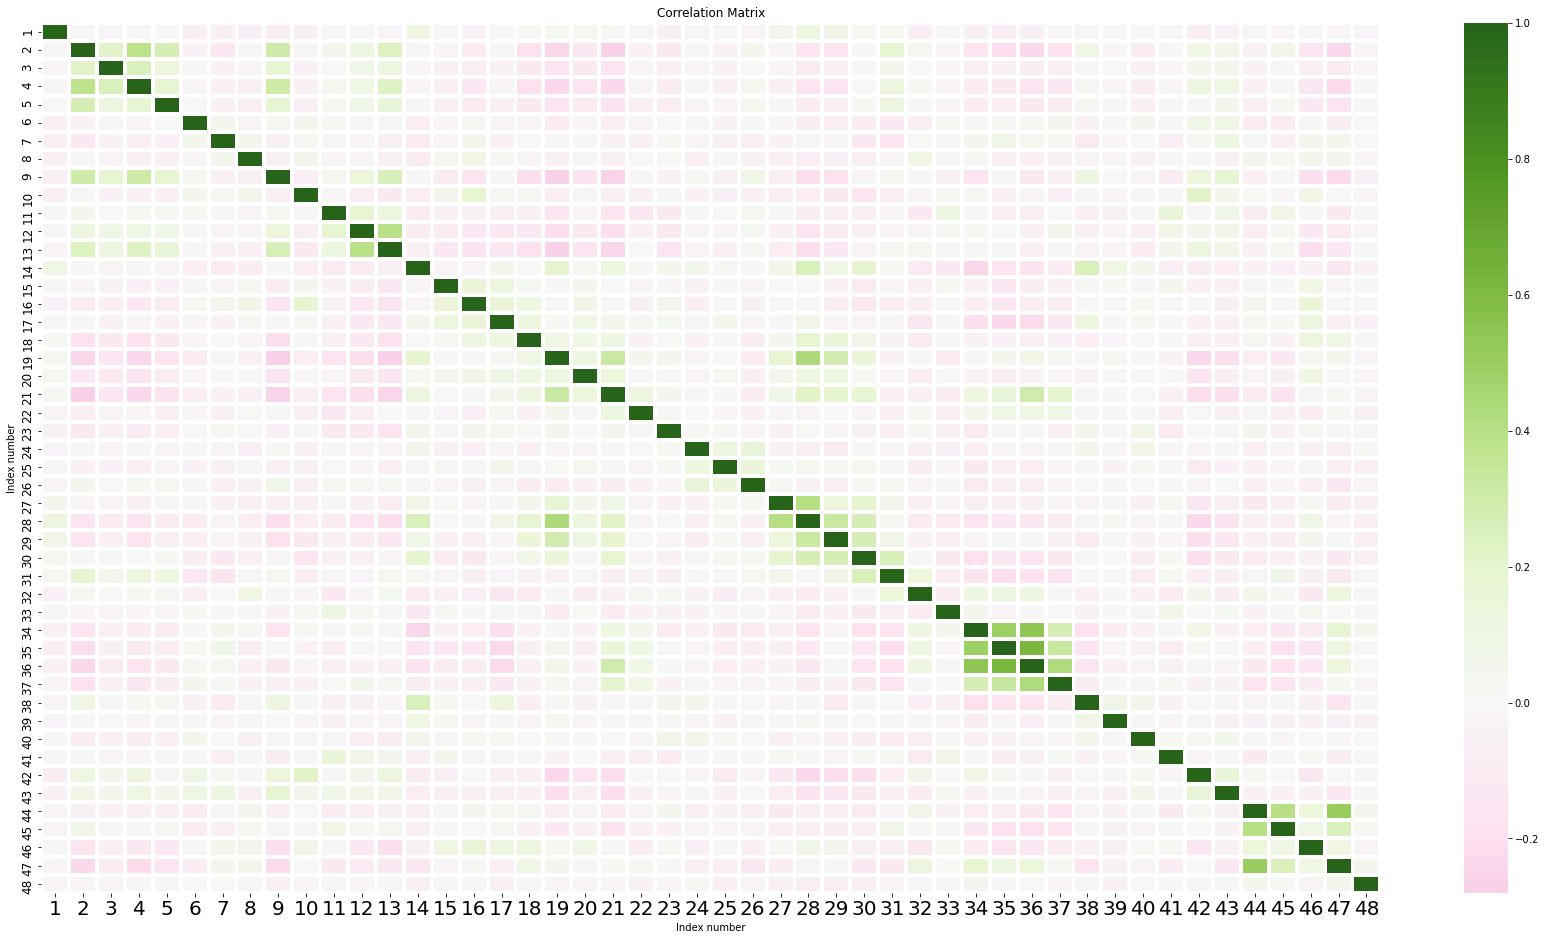

In [53]:
plt.figure(figsize=(30,16))
m = sn.heatmap(np.round(C2, 2),annot=False,linewidths=3,cmap="PiYG", fmt='g',annot_kws={"size": 8},center=0,yticklabels=yticklabels,xticklabels=xticklabels)
#sn.heatmap(np.round(C2, 2),annot=True,linewidths=3,cmap='Blues', fmt='g',annot_kws={"size": 8},center=0)
m.set_xticklabels(m.get_xmajorticklabels(), fontsize = 20)
m.set_yticklabels(m.get_ymajorticklabels(), fontsize = 12)
plt.title('Correlation Matrix')
plt.xlabel("Index number")
plt.ylabel("Index number")
plt.savefig('C2_Matrix.png')

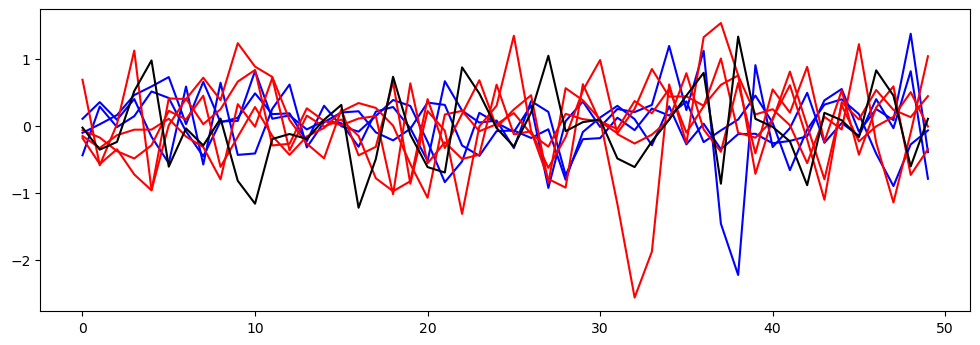

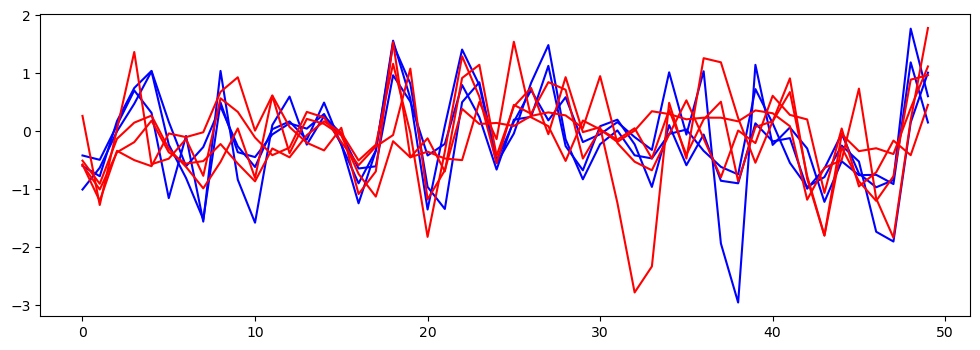

In [31]:
plot1 = plt.figure(1,figsize=(12,4), dpi=100)
for i in range(33,36):
    plt.plot(X_sim[i][100:150],"b")
for i in range(1,5):
    plt.plot(X_sim[i][100:150],"r")
plt.plot(X_sim[26][100:150],"k")
plot2 = plt.figure(2,figsize=(12,4), dpi=100)
for i in range(33,36):
    plt.plot(X[i][100:150],"b")
for i in range(1,5):
    plt.plot(X[i][100:150],"r")

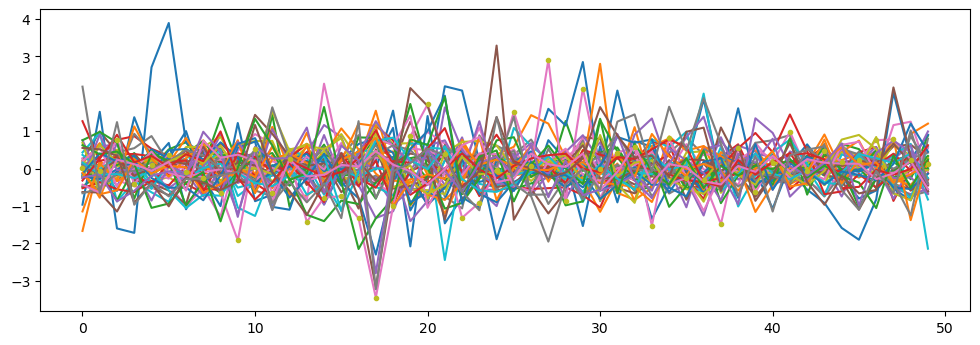

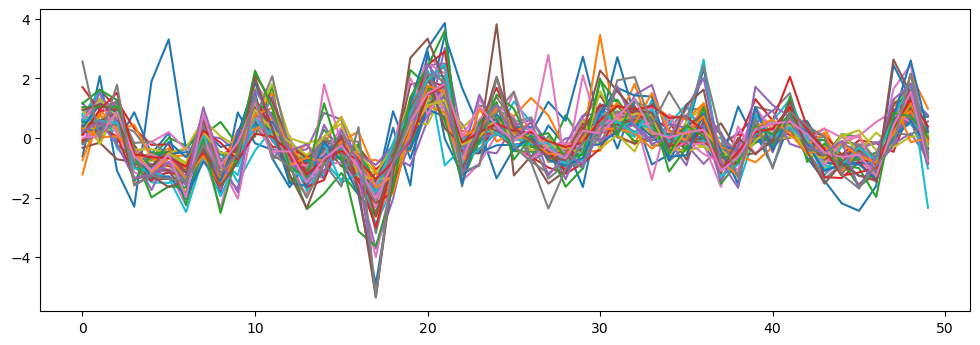

In [32]:
plot1 = plt.figure(1,figsize=(12,4), dpi=100)
for i in range(N):
    plt.plot(X_sim[i][:50])
plt.plot(X_sim[26][:50],".")
plot2 = plt.figure(2,figsize=(12,4), dpi=100)
for i in range(N):
    plt.plot(X[i][:50])
#plt.plot(X[26][:50],"k")

In [33]:
# Principal component correlation matrix, is exactly uncorrelated. Hicimos el loop para que enseñe int y no valores chicos
C_E = np.corrcoef(E)
for i in range(len(C_E)):
    for j in range(len(C_E)):
        #print(C_E[i][j], " to >>>", int(C_E[i][j]))
        C_E[i][j] = int(C_E[i][j])
print(C_E) # El primer 0 de la diagonal redondea .999 a 0, no lo arreglaste pero equis

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [34]:
values_C2 = np.zeros(triang)
count = 0
for j in range(N):
    for h in range(j+1,N):
        values_C2[count] = C2[j][h]
        count = count+1

In [35]:

L2, V2 = LA.eig(C2)
#L = np.sort(L)[::-1]
sorted_ind = np.argsort(L2)
sorted_ind = np.flip(sorted_ind) # porque los queremos en descending order

L2 = L2[sorted_ind]
V2 = np.transpose(V2)
V2 = V2[sorted_ind]

In [36]:
Nsamples = 500 # Number of shuffles
X_shuff = np.zeros((N, T))

# queremos guardar (N*N)-N)/2 values porque son los valores de la upper triang part de C matrix
# no nos interesa la lower triang porque es igual ni la diagonal de unos

triang = int(((N*N)-N)/2)
values = np.zeros((triang, Nsamples)) 

for k in range(Nsamples):
    for i in range(N):
        rand = X_sim[i][np.random.permutation(T)] # Checa bootstrap en tail Fitting DS si no entiendes esta parte
        X_shuff[i] = rand

    C_shuff = np.corrcoef(X_shuff)

    count = 0
    for j in range(N):
        for h in range(j+1,N):
            values[count][k] = C_shuff[j][h]
            count = count+1


x = np.arange(triang)+1

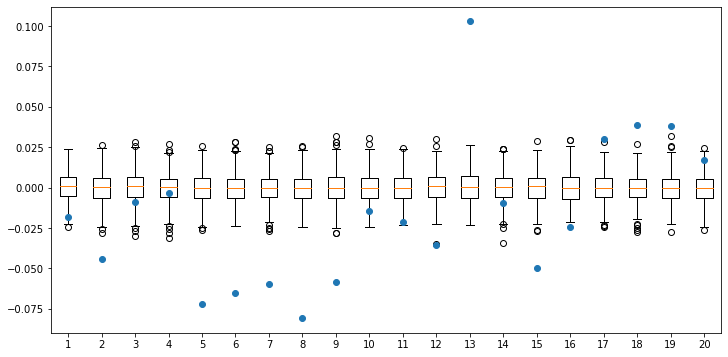

In [37]:
plt.figure(figsize=(12,6))
plt.boxplot(np.transpose(values[:20]))
plt.plot(x[:20],values_C2[:20],"o")